# Desafío de clasificación

Los expertos en vino pueden identificar vinos de viñedos específicos a través del olfato y el sabor, pero los factores que dan a los diferentes vinos sus características individuales se basan en realidad en su composición química.

En este desafío, debes entrenar un modelo de clasificación para analizar las características químicas y visuales de las muestras de vino y clasificarlas según su cultivar (variedad de uva).

## Explora los datos

Ejecute la siguiente celda para cargar un archivo CSV de datos de vino, que consta de 12 características numéricas y una etiqueta de clasificación con las siguientes clases:

- **0** (*variedad A*)
- **1** (*variedad B*)
- **2** (*variedad C*)

In [3]:
import pandas as pd
import recursos as rc

data = pd.read_csv('data/wine.csv')
data.sample(10) # Mezclamos los datos para visualizar diferentes tipos

Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
39     14.22        3.99  2.51        13.2        128     3.00        3.04   
145    13.16        3.57  2.15        21.0        102     1.50        0.55   
50     13.05        1.73  2.04        12.4         92     2.72        3.27   
34     13.51        1.80  2.65        19.0        110     2.35        2.53   
37     13.05        1.65  2.55        18.0         98     2.45        2.43   
171    12.77        2.39  2.28        19.5         86     1.39        0.51   
126    12.43        1.53  2.29        21.5         86     2.74        3.15   
12     13.75        1.73  2.41        16.0         89     2.60        2.76   
168    13.58        2.58  2.69        24.5        105     1.55        0.84   
68     13.34        0.94  2.36        17.0        110     2.53        1.30   

     Nonflavanoids  Proanthocyanins  Color_intensity   Hue  \
39            0.20             2.08         5.100000  0.89   
145           0.43             1.30         4.000000  0.60   
50            0.17             2.91         7.200000  1.12   
34            0.29             1.54         4.200000  1.10   
37            0.29             1.44         4.250000  1.12   
171           0.48             0.64         9.899999  0.57   
126           0.39             1.77         3.940000  0.69   
12            0.29             1.81         5.600000  1.15   
168           0.39             1.54         8.660000  0.74   
68            0.55             0.42         3.170000  1.02   

     OD280_315_of_diluted_wines  Proline  WineVariety  
39                         3.53      760            0  
145                        1.68      830            2  
50                         2.91     1150            0  
34                         2.87     1095            0  
37                         2.51     1105            0  
171                        1.63      470            2  
126                        2.84      352            1  
12                         2.90     1320            0  
168                        1.80      750            2  
68                         1.93      750            1

Su desafío es explorar los datos y entrenar un modelo de clasificación que logre una métrica general de *Recall* superior a 0,95 (95%).

In [4]:
data.isnull().sum() # No tenemos datos nulos o vacios

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

Deseamos explorar los dispersion de datos para cada tipo de vino, para ello exploraremos variable por variable teniendo como referencia la etiqueta 'WineVariety'

In [15]:
for colums in data.columns[:-1]:
    rc.box_and_whisker(df = data,
                       label_x = 'WineVariety',
                       label_y = colums,
                       show=True)
    print('')

## Conclusiones rapidas

Pudimos observar que solo para algunas caracteristicas la diferencia se hace evidente, pero para otras se superponen los valores entre los tipos de vino, se podria optar por una de dos opciones:

- Hacer un modelo solo con variables que nos parezcan puedan agrupar los tipos de  manera distintiva
- Hacer un modelo con todas las variables y a tomad por culo el analisis, joder 

In [24]:
# Usamos todas las caracteristicas como variables para el modelo
X = data[data.columns[:-1]].values 

# Etiqueta
y = data[data.columns[-1]].values

In [29]:
# Spliteamos los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Split 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


# Estandarizamos los datos

In [26]:
# Preparamos el pipeline para el segundo caso (ya veremos luego si nos mandamos por el primero)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  # Modelo ML

In [31]:
# Definimos el preprocesamiento para las columnas numericas (estandarizado de datos)
feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())])

# Creamos los pasos de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[('preprocess', feature_transformer, feature_columns)])

# Creamos el Pipeline de entrenamiento
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                           ('regressor',LogisticRegression(solver='lbfgs', multi_class='auto'))])

# Entrenamos el pipeline del modelo

model = pipeline.fit(X_train,y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


In [33]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = model.predict(X_test)


Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9576923076923077
Overall Recall: 0.9710144927536232


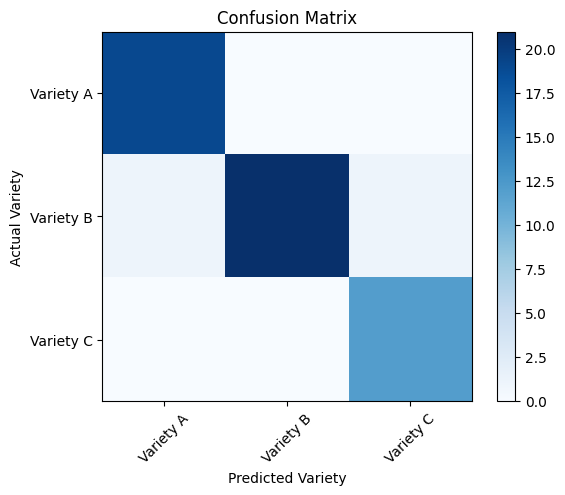

In [34]:

# Metricas
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Matriz de Confusion
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

Average AUC: 0.9922585117148489


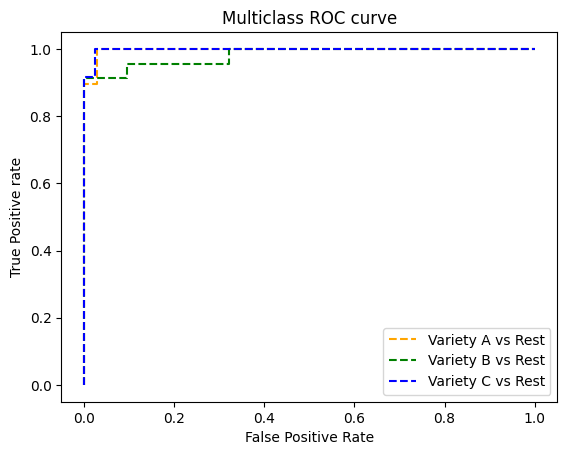

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='Alcohol', ylabel='Malic_acid'>

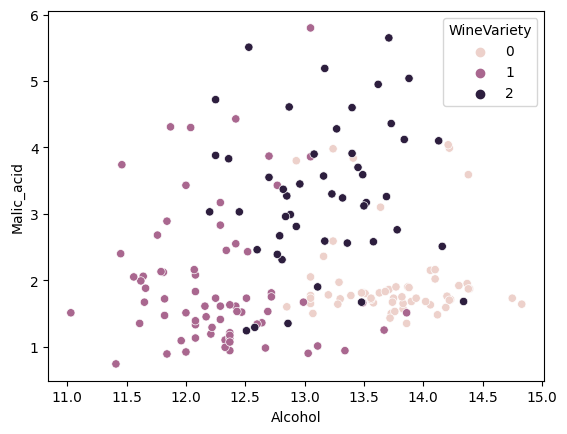

In [8]:
import seaborn as sns
sns.scatterplot(data=data,x='Alcohol',y='Malic_acid',hue = 'WineVariety')

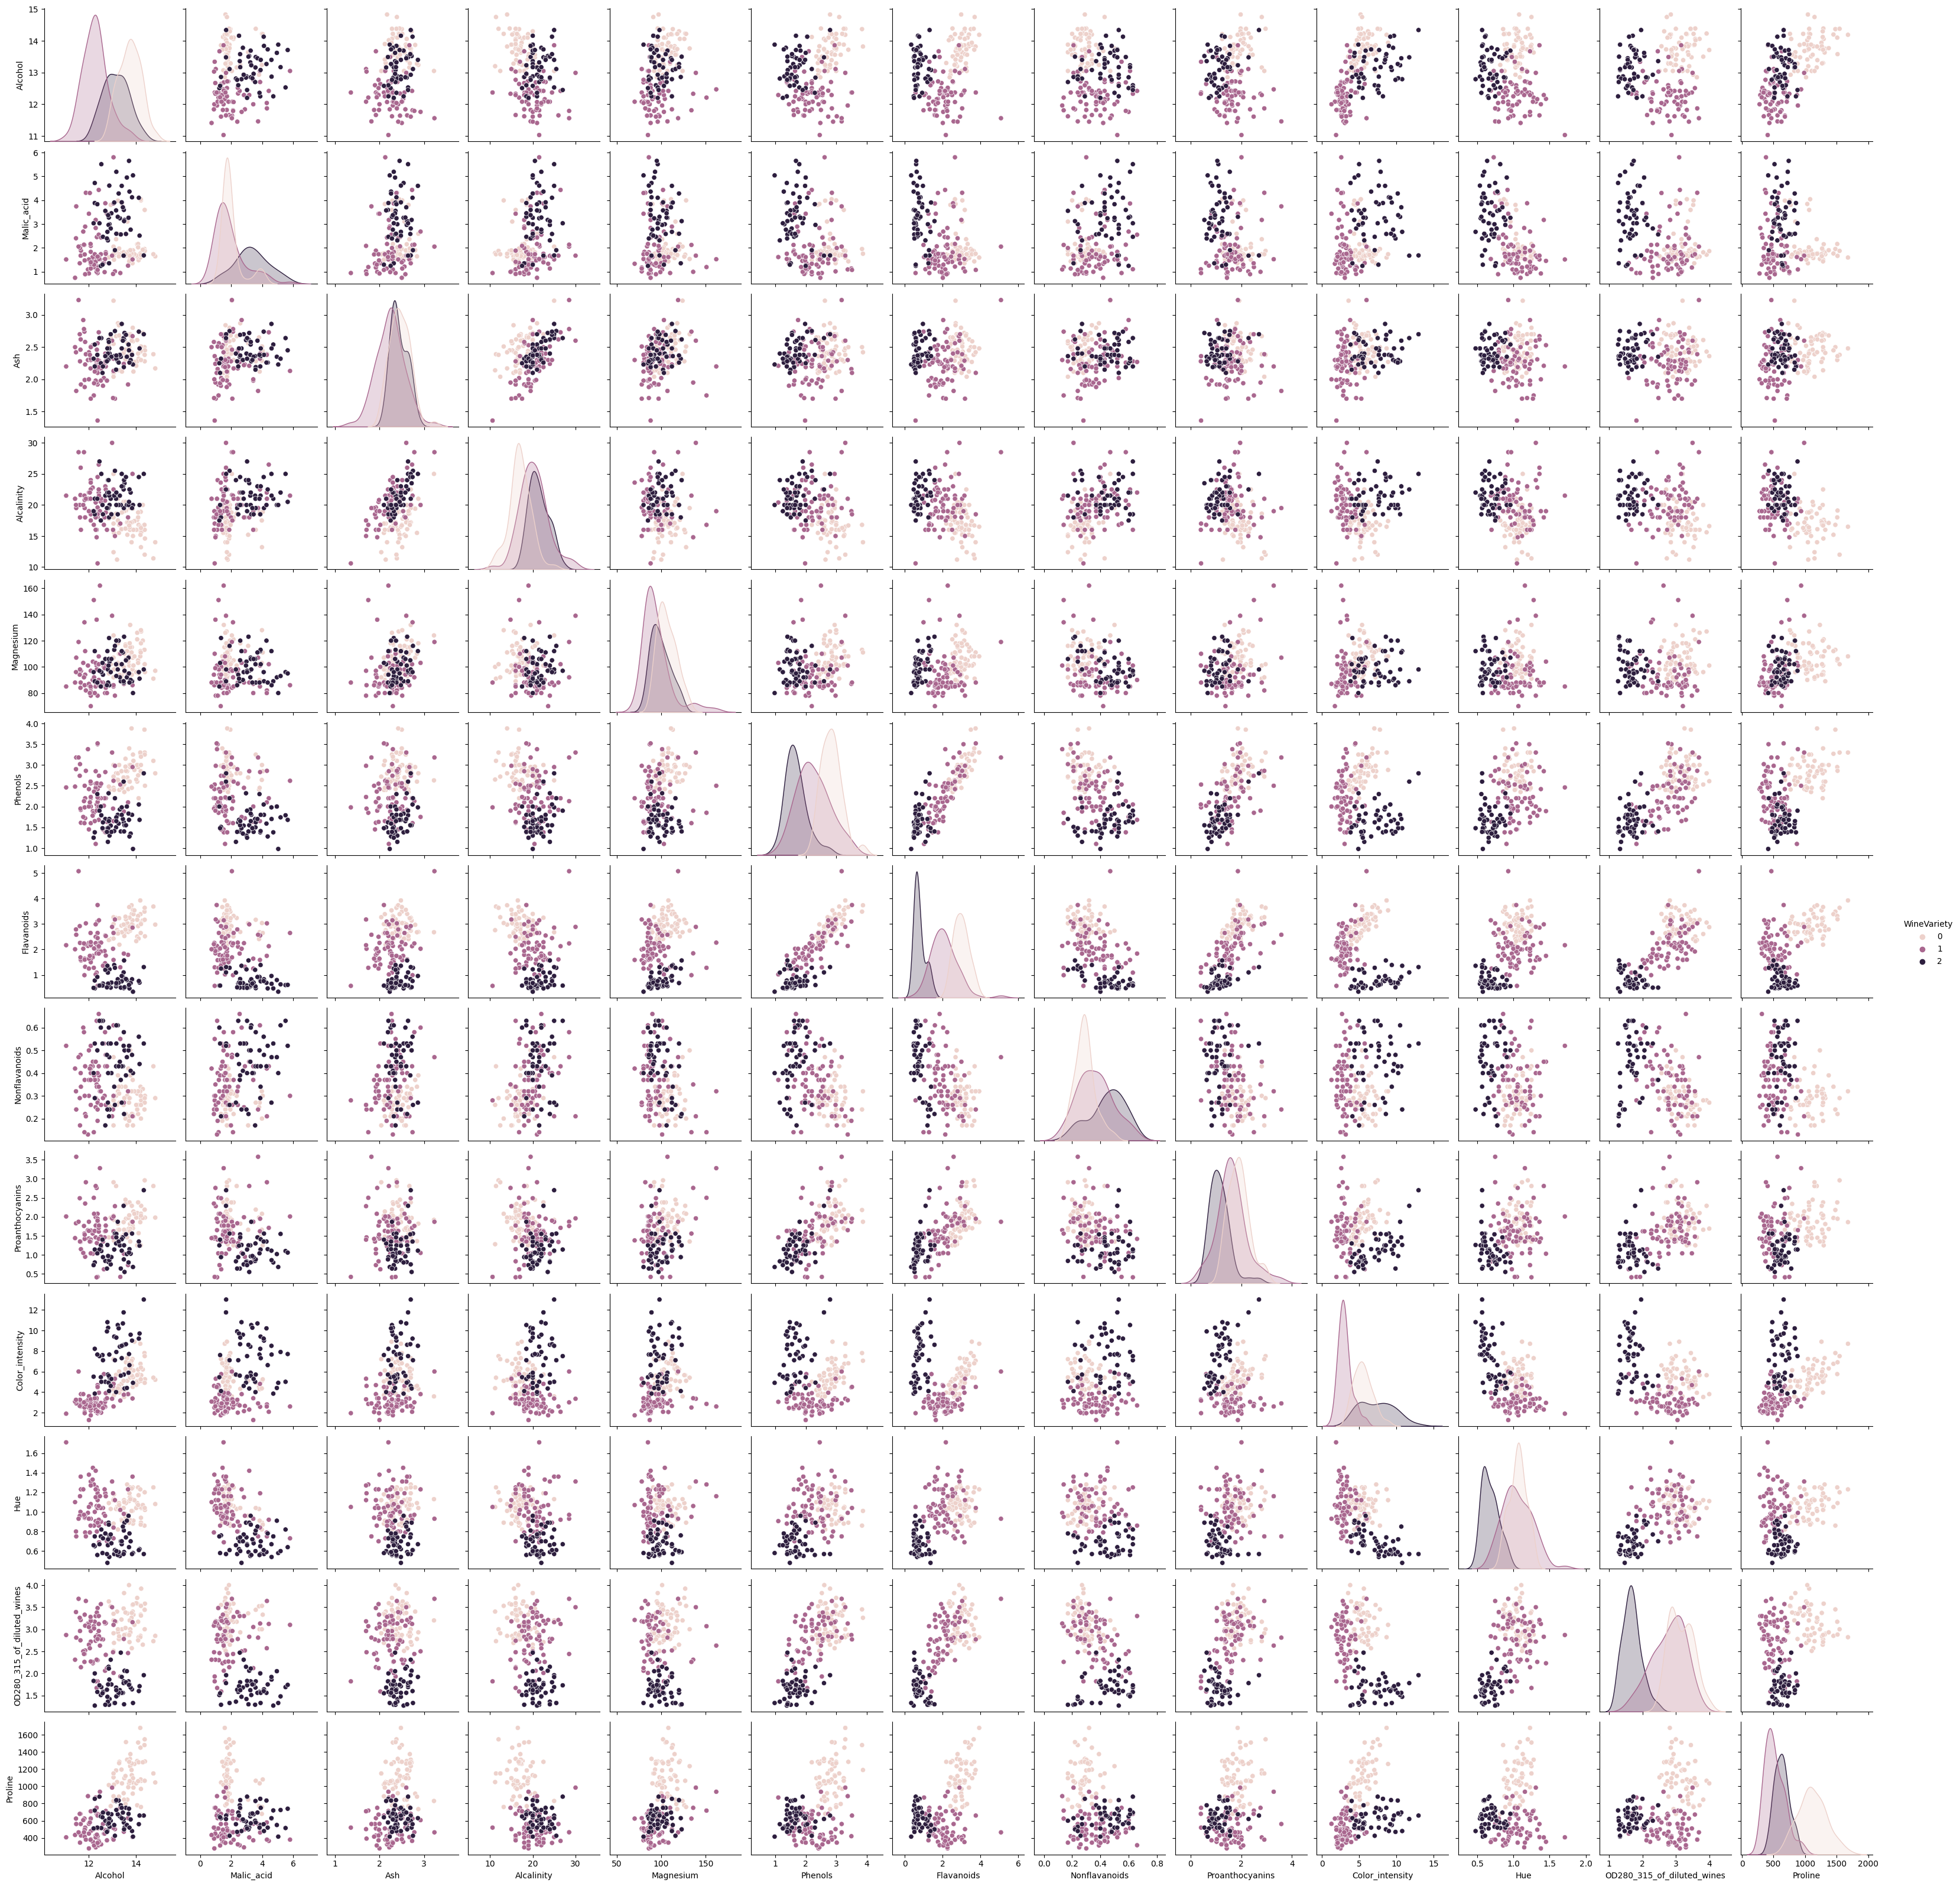

In [9]:
sns.pairplot(data = data, hue = 'WineVariety')

In [ ]:
# ?